# Exploratory Data Analytics on Zomato Dataset

The basic idea is analyzing the Buisness Problem of Zomato to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more. I have provided the link to download the dataset at the end of this notebook.

In [1]:
pwd


'C:\\Users\\admin'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
zomato = pd.read_csv("zomato.csv")

In [3]:
zomato.shape

(51717, 17)

In [9]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
zomato2 = zomato.drop(['url','dish_liked','phone'],axis=1)

In [8]:
zomato2.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
zomato2.shape

(51717, 14)

In [10]:
zomato2.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
zomato2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [12]:
zomato2.duplicated().shape

(51717,)

In [23]:
zomato2.duplicated().sum()

43

In [13]:
zomato2[zomato2.duplicated()==True]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
596,"572, 30th Main, 3rd Stage, Banashankari, Banga...",My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
7599,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield
9464,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9/5,201,BTM,Quick Bites,"North Indian, Street Food",300,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
9466,"607, First Floor, 80 Feet Road, 6th Block, Kor...",Carrots,Yes,Yes,4.1/5,600,Koramangala 6th Block,Casual Dining,"Italian, North Indian, Healthy Food, Desserts","1,100","[('Rated 5.0', ""RATED\n It's the first vegan ...",[],Delivery,BTM
9467,"Building 58, New 3, A Main Road Marenahalli, J...",Eatsomnia,Yes,No,NEW,0,JP Nagar,Delivery,"North Indian, South Indian, Chinese, Continental",500,"[('Rated 1.0', ""RATED\n The worst food I ate ...",[],Delivery,BTM
9468,"6th Cross Road, Koramangala 6th Block, Bangalore",Rolls & Co,Yes,No,3.9/5,213,Koramangala 6th Block,Quick Bites,"Burger, Beverages, Rolls",400,"[('Rated 2.0', 'RATED\n Order : Peri Peri Fri...",[],Delivery,BTM
9469,"10, Opposite Forum Mall, Taverekere, Suddagunt...",Fogg,No,Yes,NEW,0,BTM,Quick Bites,"Fast Food, Chinese",200,"[('Rated 5.0', 'RATED\n Seafood soup - A Thai...",[],Delivery,BTM
9470,"Koramangala 1st Block, Bangalore",The Paratha Stories,Yes,No,3.3/5,36,Koramangala 1st Block,Delivery,North Indian,400,"[('Rated 3.0', 'RATED\n There is enough scope...",[],Delivery,BTM
9471,"29, 7th Cross Road, Bhavani Nagar, Suddagunte ...",Mycakeshop,Yes,No,NaN,0,BTM,Bakery,"Bakery, Desserts",300,"[('Rated 5.0', 'RATED\n I loved cake nice tru...","['Red Velvet Cake', 'Truffle Chocolate Cake', ...",Delivery,BTM
9549,"51, 5th Main, 60 Feet Road, BNG Homestay Build...",Bisimillah Biriyani,No,No,3.5/5,11,BTM,Quick Bites,"Biryani, Fast Food",300,"[('Rated 4.0', 'RATED\n Very delicious food @...",[],Delivery,BTM


In [14]:
zomato2[zomato2.duplicated()==True].shape

(43, 14)

#data Transformation

In [15]:
51717-43

51674

In [16]:
zomato2.drop_duplicates(inplace=True)  #permanatly i want to drop

In [17]:
zomato2.shape

(51674, 14)

In [18]:
zomato2.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [31]:
zomato2.isnull()  #for detecting missing values

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51713,False,False,False,False,True,False,False,False,False,False,False,False,False,False
51714,False,False,False,False,True,False,False,False,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
zomato2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

In [20]:
zomato2.isnull().sum()  #for checking total missing values in perticular columns

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [21]:
51674-(7767+21+227+45+345)    #because one row contain multiple null values

43269

In [22]:
zomato2.dropna(how="any",inplace=True)  #removuing missing values permantly, If any NA values are present, drop that row or column

In [23]:
zomato2.shape

(43499, 14)

In [24]:
zomato2.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [25]:
zomato3=zomato2.rename(columns={'approx_cost(for two people)':'cost','listed_in(city)':'city','listed_in(type)':'type'})

In [26]:
zomato3.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [27]:
zomato3.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [28]:
zomato3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost          43499 non-null  object
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [29]:
#Transformation
zomato3['cost']=zomato3['cost'].astype(str)

In [30]:
type(zomato3['cost'])

pandas.core.series.Series

In [31]:
lambda v: v.replace(',','.')


<function __main__.<lambda>(v)>

In [32]:
zomato3['cost']=zomato3['cost'].apply(lambda v: v.replace(',','.'))

In [33]:
zomato3['cost']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1.500
51715    2.500
51716    1.500
Name: cost, Length: 43499, dtype: object

In [34]:
zomato3['cost']=zomato3['cost'].astype(float)

In [35]:
type(zomato3['cost'])

pandas.core.series.Series

In [36]:
zomato3.info()   #converted into float cost columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [37]:
zomato3['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51709    3.7 /5
51711    2.5 /5
51712    3.6 /5
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 43499, dtype: object

In [38]:
zomato3['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [39]:
zomato4=zomato3.loc[zomato3['rate']!='NEW']  #except NEW rating other things assign to zomato4

In [40]:
zomato4['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [41]:
zomato5=zomato4.loc[zomato4['rate']!='-'] 

In [42]:
zomato5['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [43]:
remove_slash=lambda v:v.replace('/5','')if type(v)==np.str else v

In [44]:
int('')  #cannot convert space into integer

ValueError: invalid literal for int() with base 10: ''

In [45]:
'hello     '.strip()  #remove tailing and leading space

'hello'

In [46]:
zomato5['rate']=zomato5['rate'].apply(remove_slash).str.strip().astype('float')

<ipython-input-46-5bd6703363b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato5['rate']=zomato5['rate'].apply(remove_slash).str.strip().astype('float')


In [47]:
zomato5

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [48]:
zomato5.info()  #rating column is converted to flaot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  object 
 3   book_table    41237 non-null  object 
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.7+ MB


In [49]:
zomato5['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41237, dtype: float64

In [50]:
#in online order yes or no 
'hello everyone'.title()

'Hello Everyone'

In [51]:
lambda z:z.title()

<function __main__.<lambda>(z)>

In [52]:
zomato5['name']=zomato5['name'].apply(lambda z:z.title())

<ipython-input-52-eaa10a14e7ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato5['name']=zomato5['name'].apply(lambda z:z.title())


In [53]:
zomato5['name']

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51709                           The Farm House Bar N Grill
51711                                              Bhagini
51712    Best Brews - Four Points By Sheraton Bengaluru...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: name, Length: 41237, dtype: object

In [56]:
zomato5['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51709     No
51711     No
51712     No
51715     No
51716     No
Name: online_order, Length: 41237, dtype: object

In [57]:
zomato5['online_order'].replace(('Yes','No'),(True,False),inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [58]:
zomato5.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [59]:

zomato5['book_table'].replace(('Yes','No'),(True,False),inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [60]:
zomato5['book_table']

0         True
1        False
2        False
3        False
4        False
         ...  
51709    False
51711    False
51712    False
51715     True
51716    False
Name: book_table, Length: 41237, dtype: bool

In [61]:
zomato5.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [62]:
zomato5.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [63]:
zomato5['cost']

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51709    800.0
51711    800.0
51712      1.5
51715      2.5
51716      1.5
Name: cost, Length: 41237, dtype: float64

In [64]:
zomato5['cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [65]:
#for creating models we need our data should be in numeric
zomato5

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [66]:
zomato5['name'].factorize()

(array([   0,    1,    2, ..., 6532, 6568, 6569], dtype=int64),
 Index(['Jalsa', 'Spice Elephant', 'San Churro Cafe', 'Addhuri Udupi Bhojana',
        'Grand Village', 'Timepass Dinner',
        'Rosewood International Hotel - Bar & Restaurant', 'Onesta',
        'Penthouse Cafe', 'Smacznego',
        ...
        'Food Dig', 'Ishwaryam', 'Hungry Wok', 'Mad Kitchen', 'Polly'S Kitchen',
        'Calcutta North Indian Meals',
        'Chime - Sheraton Grand Bengaluru Whitefield Hotel &...',
        'The Nest - The Den Bengaluru', 'Nawabs Empire', 'Seeya Restaurant'],
       dtype='object', length=6572))

In [67]:
zomato5['name'].factorize()[0]

array([   0,    1,    2, ..., 6532, 6568, 6569], dtype=int64)

In [68]:
zomato5_copy=zomato5.copy()

In [69]:
def convert_Tonumbers(z):
    for c in zomato5.columns[~zomato5.columns.isin(['cost','rate','votes'])]:
        zomato5[c]=zomato5[c].factorize()[0]
    return zomato5

In [70]:
zomato5_encoded=convert_Tonumbers(zomato5)

<ipython-input-69-4758d768b10d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato5[c]=zomato5[c].factorize()[0]


In [71]:
zomato5_encoded.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


In [72]:
zomato5_encoded.corr()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
address,1.000000,0.682346,0.165707,0.021447,-0.036195,-0.010738,0.614626,0.030634,0.238421,0.003227,0.512074,0.058929,0.094137,0.423011
name,0.682346,1.000000,0.231616,-0.033718,-0.046936,-0.043871,0.448705,0.036212,0.301793,-0.084328,0.339130,-0.031798,0.116000,0.307128
online_order,0.165707,0.231616,1.000000,-0.054894,-0.069042,0.013278,0.048645,0.136741,0.049921,-0.180782,0.051440,-0.362114,0.239236,0.054354
book_table,0.021447,-0.033718,-0.054894,1.000000,-0.426027,-0.393270,-0.032781,-0.226763,-0.225396,0.266651,-0.132809,0.040496,-0.114302,-0.028847
rate,-0.036195,-0.046936,-0.069042,-0.426027,1.000000,0.435237,0.030363,0.196933,0.189624,-0.115346,0.159661,0.054942,0.034038,0.023908
votes,-0.010738,-0.043871,0.013278,-0.393270,0.435237,1.000000,0.006847,0.221805,0.158714,-0.116118,0.140364,-0.000754,0.070373,0.026348
location,0.614626,0.448705,0.048645,-0.032781,0.030363,0.006847,1.000000,0.046133,0.178518,-0.020351,0.407854,0.089058,0.040451,0.361957
rest_type,0.030634,0.036212,0.136741,-0.226763,0.196933,0.221805,0.046133,1.000000,0.158553,-0.287720,0.085501,-0.023399,0.147835,0.047756
cuisines,0.238421,0.301793,0.049921,-0.225396,0.189624,0.158714,0.178518,0.158553,1.000000,-0.044700,0.196259,0.026915,0.083311,0.141997
cost,0.003227,-0.084328,-0.180782,0.266651,-0.115346,-0.116118,-0.020351,-0.287720,-0.044700,1.000000,-0.007775,0.073016,-0.156012,-0.026472


<AxesSubplot:>

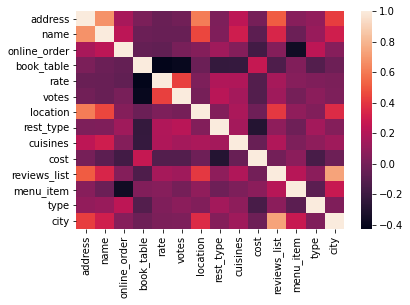

In [73]:
sns.heatmap(zomato5_encoded.corr())

<AxesSubplot:>

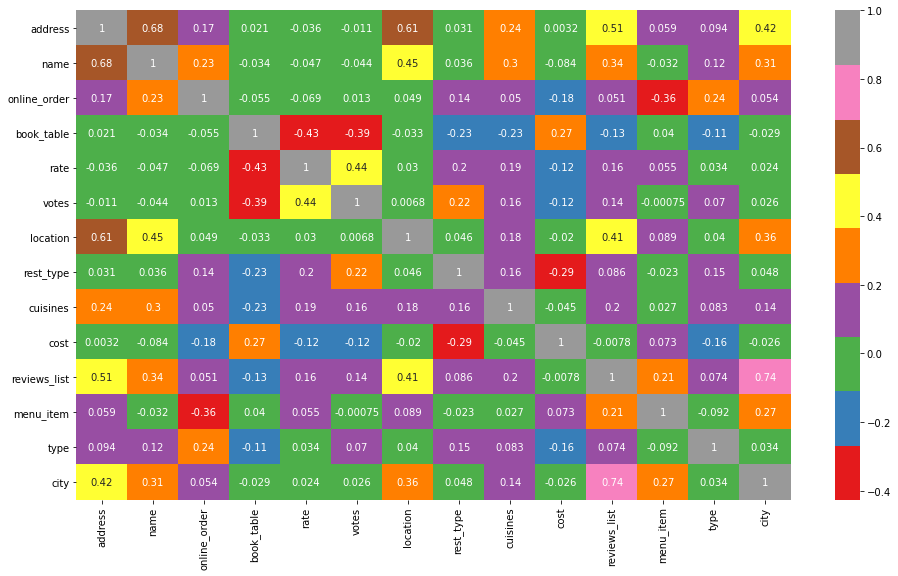

In [74]:
plt.figure(figsize=(16,9))
sns.heatmap(zomato5_encoded.corr(),annot=True,cmap='Set1')

In [75]:
zomato5_encoded['online_order']

0        0
1        0
2        0
3        1
4        1
        ..
51709    1
51711    1
51712    1
51715    1
51716    1
Name: online_order, Length: 41237, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

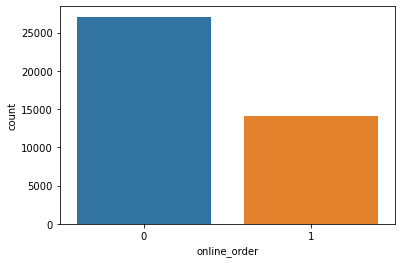

In [76]:
sns.countplot(zomato5_encoded['online_order'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

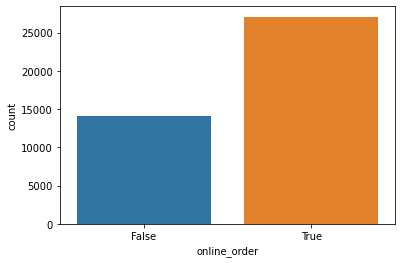

In [77]:
sns.countplot(zomato5_copy['online_order'])   #providing data who is delievering online order

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

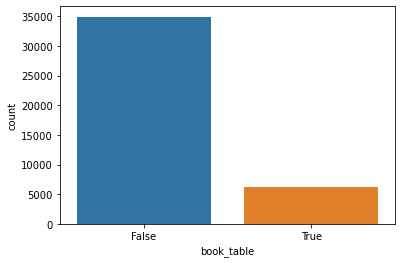

In [78]:
sns.countplot(zomato5_copy['book_table'])  #who is proviing book table 

In [79]:
pd.crosstab(zomato5_copy['rate'],zomato5_copy['book_table'])   #rating is increase if online booking facility provided...
#depending on table booking how rating will change   restarant having lowest rating none of them they are not providing online booking

book_table,False,True
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0
2.4,66,0
2.5,98,2
2.6,245,4
2.7,299,4


In [80]:
type(pd.crosstab(zomato5_copy['rate'],zomato5_copy['book_table']))

pandas.core.frame.DataFrame

In [81]:
Y=pd.crosstab(zomato5_copy['rate'],zomato5_copy['book_table'])


In [82]:
Y

book_table,False,True
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0
2.4,66,0
2.5,98,2
2.6,245,4
2.7,299,4


In [84]:
Y.sum()

book_table
False    34938
True      6299
dtype: int64

In [85]:
Y.sum(1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      66
2.5     100
2.6     249
2.7     303
2.8     580
2.9     801
3.0     990
3.1    1550
3.2    1844
3.3    2272
3.4    2444
3.5    2763
3.6    3286
3.7    3807
3.8    3816
3.9    3954
4.0    3144
4.1    2925
4.2    2154
4.3    1682
4.4    1146
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

<AxesSubplot:xlabel='rate'>

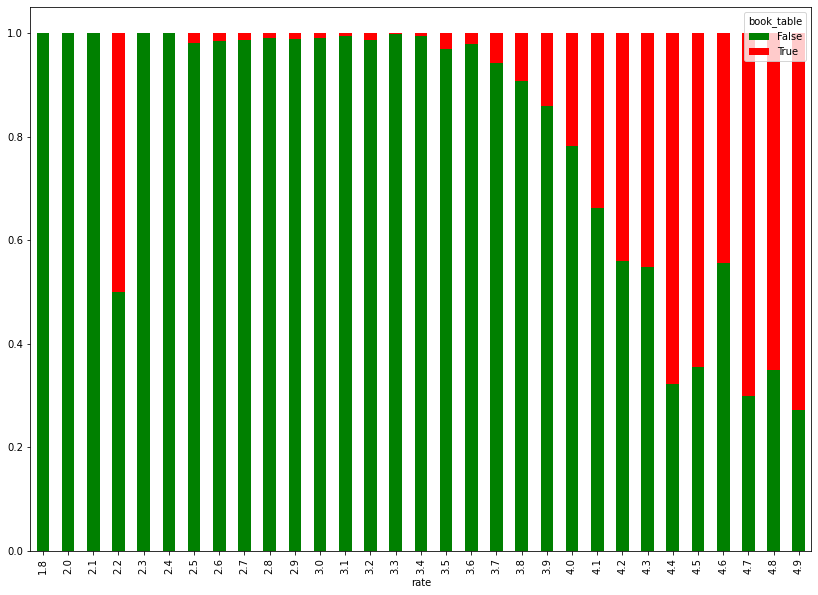

In [83]:
plt.rcParams['figure.figsize']=(14,10)
Y=pd.crosstab(zomato5_copy['rate'],zomato5_copy['book_table'])
Y.div(Y.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['green','red'])

In [86]:
zomato5_copy

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [87]:
zomato5_copy['city']

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Banashankari
             ...     
51709      Whitefield
51711      Whitefield
51712      Whitefield
51715      Whitefield
51716      Whitefield
Name: city, Length: 41237, dtype: object

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

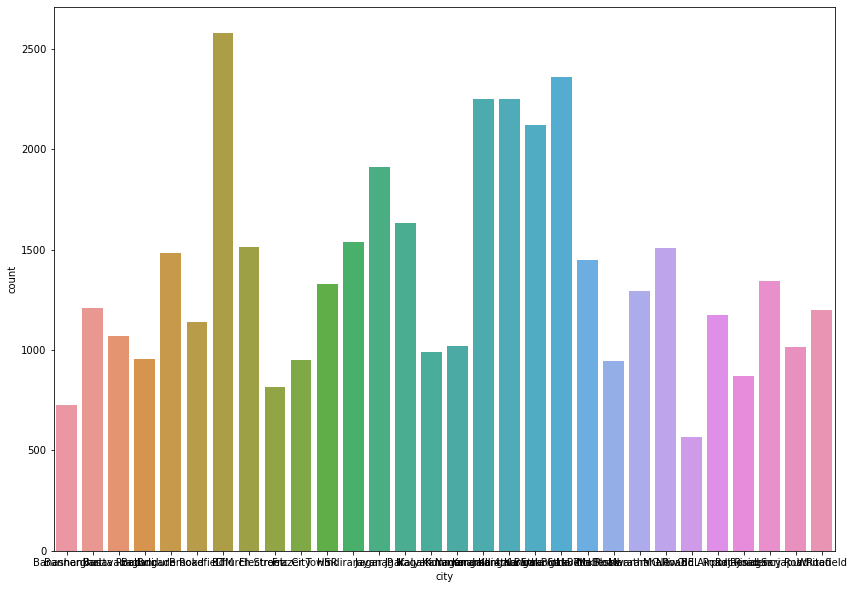

In [90]:
sns.countplot(zomato5_copy['city'])


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Banashankari'),
 Text(1, 0, 'Bannerghatta Road'),
 Text(2, 0, 'Basavanagudi'),
 Text(3, 0, 'Bellandur'),
 Text(4, 0, 'Brigade Road'),
 Text(5, 0, 'Brookefield'),
 Text(6, 0, 'BTM'),
 Text(7, 0, 'Church Street'),
 Text(8, 0, 'Electronic City'),
 Text(9, 0, 'Frazer Town'),
 Text(10, 0, 'HSR'),
 Text(11, 0, 'Indiranagar'),
 Text(12, 0, 'Jayanagar'),
 Text(13, 0, 'JP Nagar'),
 Text(14, 0, 'Kalyan Nagar'),
 Text(15, 0, 'Kammanahalli'),
 Text(16, 0, 'Koramangala 4th Block'),
 Text(17, 0, 'Koramangala 5th Block'),
 Text(18, 0, 'Koramangala 6th Block'),
 Text(19, 0, 'Koramangala 7th Block'),
 Text(20, 0, 'Lavelle Road'),
 Text(21, 0, 'Malleshwaram'),
 Text(22, 0, 'Marathahalli'),
 Text(23, 0, 'MG Road'),
 Text(24, 0, 'New BEL Road'),
 Text(25, 0, 'Old Airport Road'),
 Text(26, 0, 'Rajajinagar'),
 Text(27, 0, 'Residency Road'),
 Text(28, 0, 'Sarjapur Road'),
 Text(29, 0, 'Whitefield')]

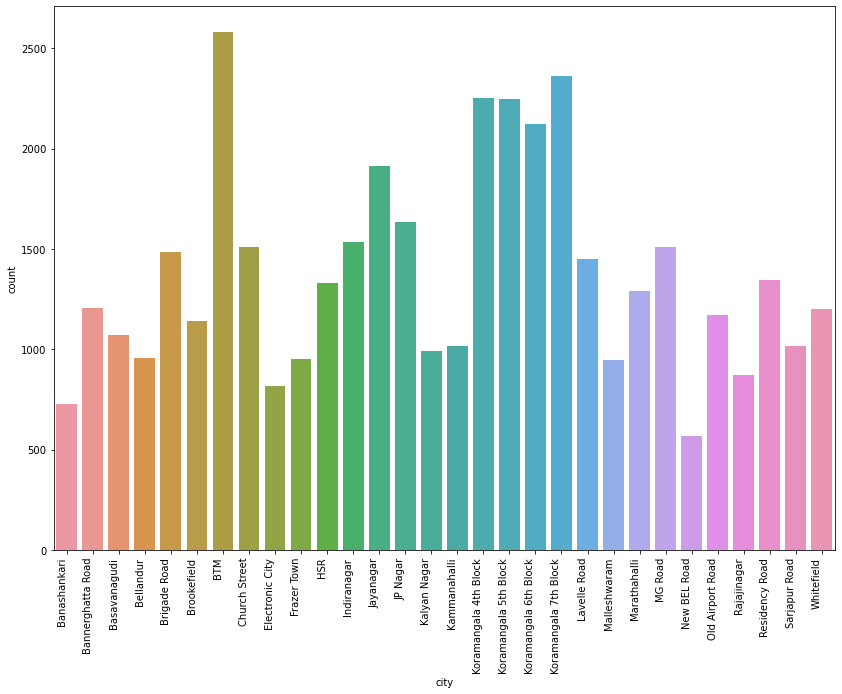

In [92]:
sns.countplot(zomato5_copy['city'])
sns.countplot(zomato5_copy['city']).set_xticklabels(
sns.countplot(zomato5_copy['city']).get_xticklabels(),
rotation=90,ha="right")

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of Restaurants Locationwise')

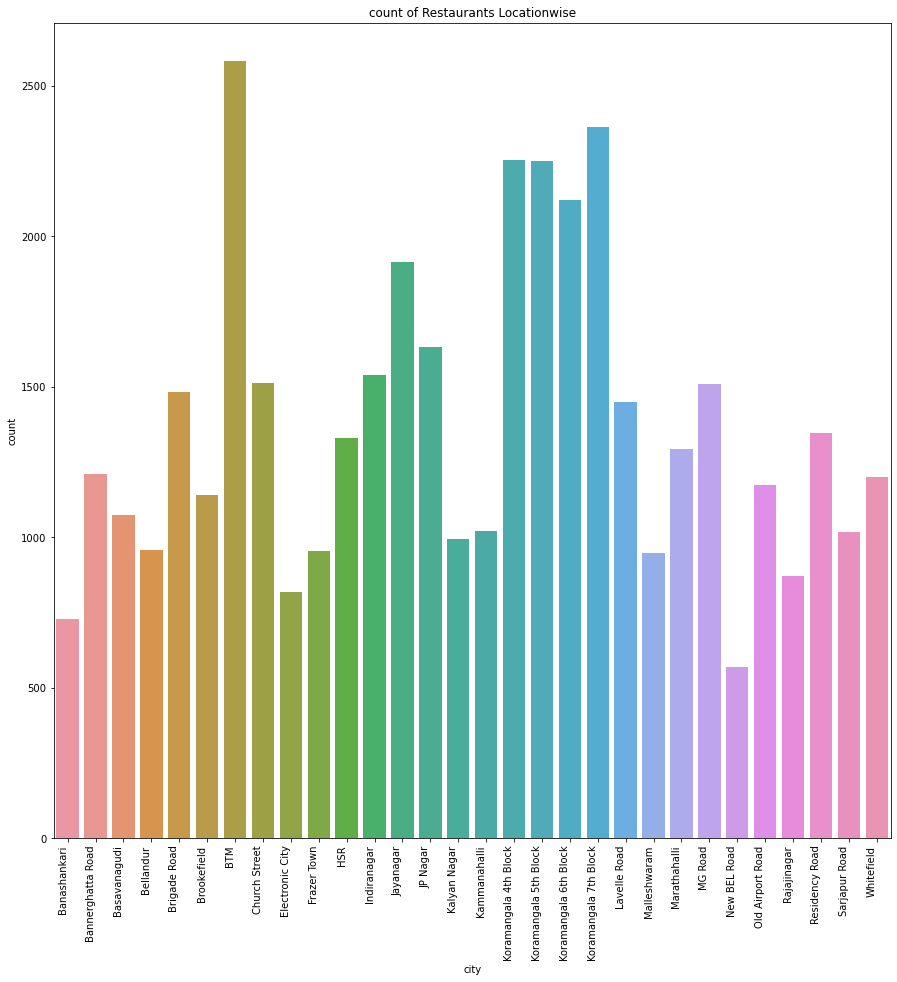

In [94]:
sns.countplot(zomato5_copy['city'])
sns.countplot(zomato5_copy['city']).set_xticklabels(
sns.countplot(zomato5_copy['city']).get_xticklabels(),
rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.title("count of Restaurants Locationwise")

In [95]:
#i want see relationship between location and rating
pd.crosstab(zomato5_copy['rate'],zomato5_copy['city'])

city,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
rate,,,,,,,,,,,,,,,,,,,,,
1.8,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2.0,0,0,0,0,0,2,0,2,0,0,...,1,2,0,2,0,0,0,2,0,0
2.1,0,0,0,0,2,1,4,1,0,1,...,1,1,0,6,0,0,0,0,3,0
2.2,2,0,2,0,1,3,3,3,0,1,...,2,3,0,0,0,0,0,2,0,0
2.3,4,0,3,0,4,1,2,1,0,0,...,2,1,2,2,0,0,2,3,4,0
2.4,2,0,5,0,1,0,6,0,2,1,...,0,0,2,8,0,9,2,0,1,0
2.5,6,3,2,3,1,4,0,4,5,2,...,5,4,2,1,3,3,0,4,1,9
2.6,19,4,12,7,9,4,15,3,2,2,...,5,6,5,17,4,3,2,7,7,11
2.7,20,6,16,11,4,7,12,9,11,8,...,5,9,12,10,6,9,7,3,12,11


<AxesSubplot:xlabel='rate'>

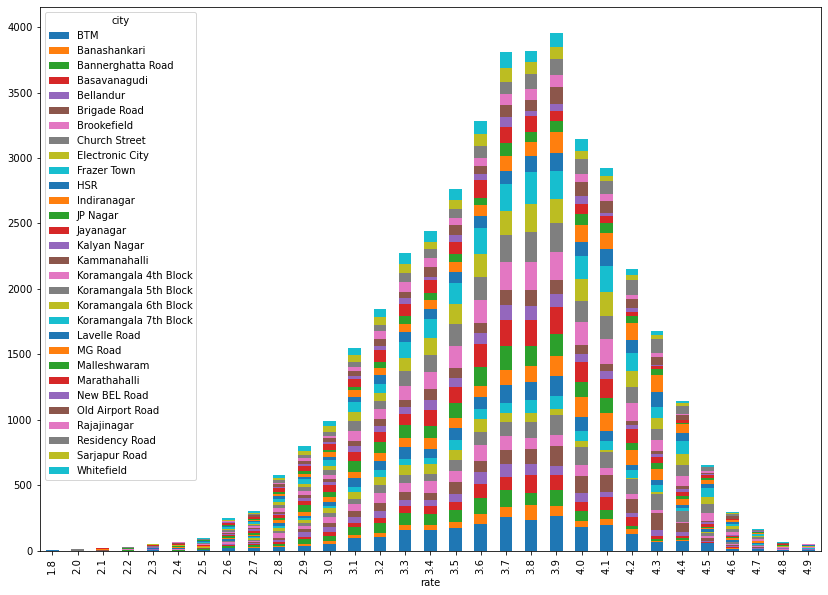

In [98]:
loc_plt=pd.crosstab(zomato5_copy['rate'],zomato5_copy['city'])
loc_plt.plot(kind="bar",stacked=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of Restaurants according to type')

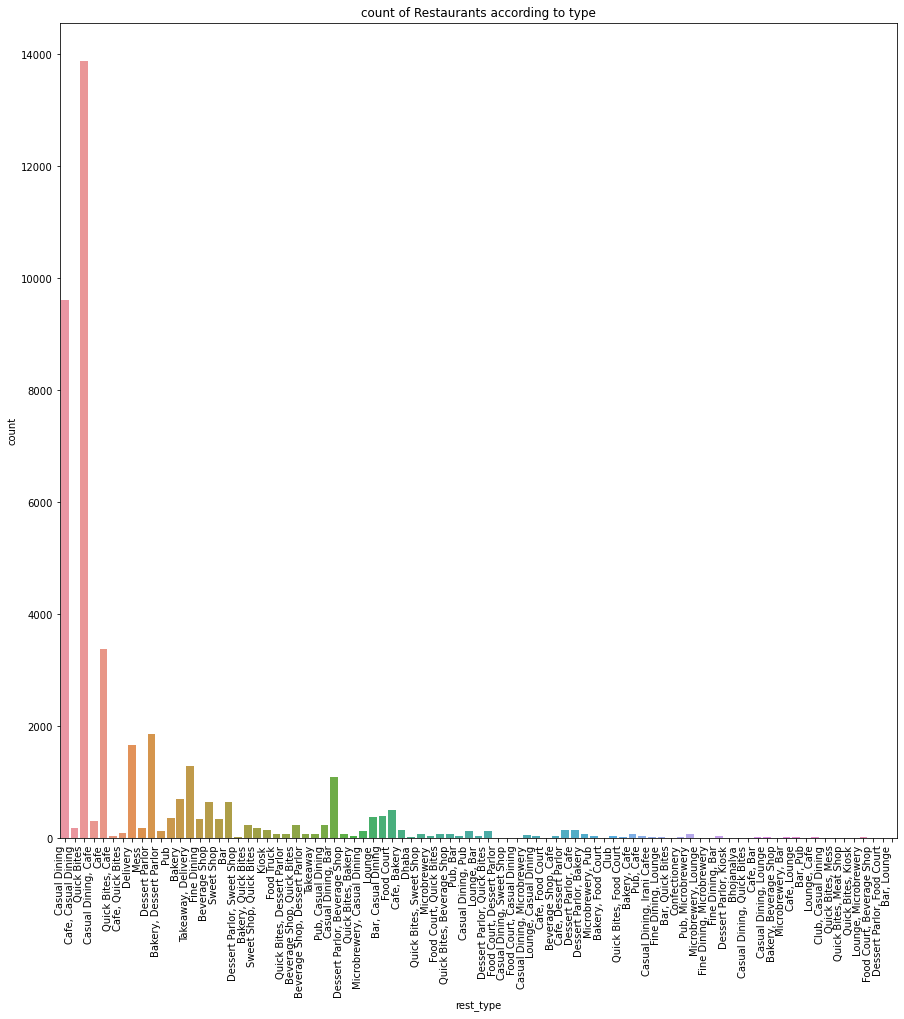

In [99]:
#i want to see which types of restaurant are more...
sns.countplot(zomato5_copy['rest_type'])
sns.countplot(zomato5_copy['rest_type']).set_xticklabels(
sns.countplot(zomato5_copy['rest_type']).get_xticklabels(),
rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.title("count of Restaurants according to type")

In [100]:
zomato5_copy.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of Restaurants according to type')

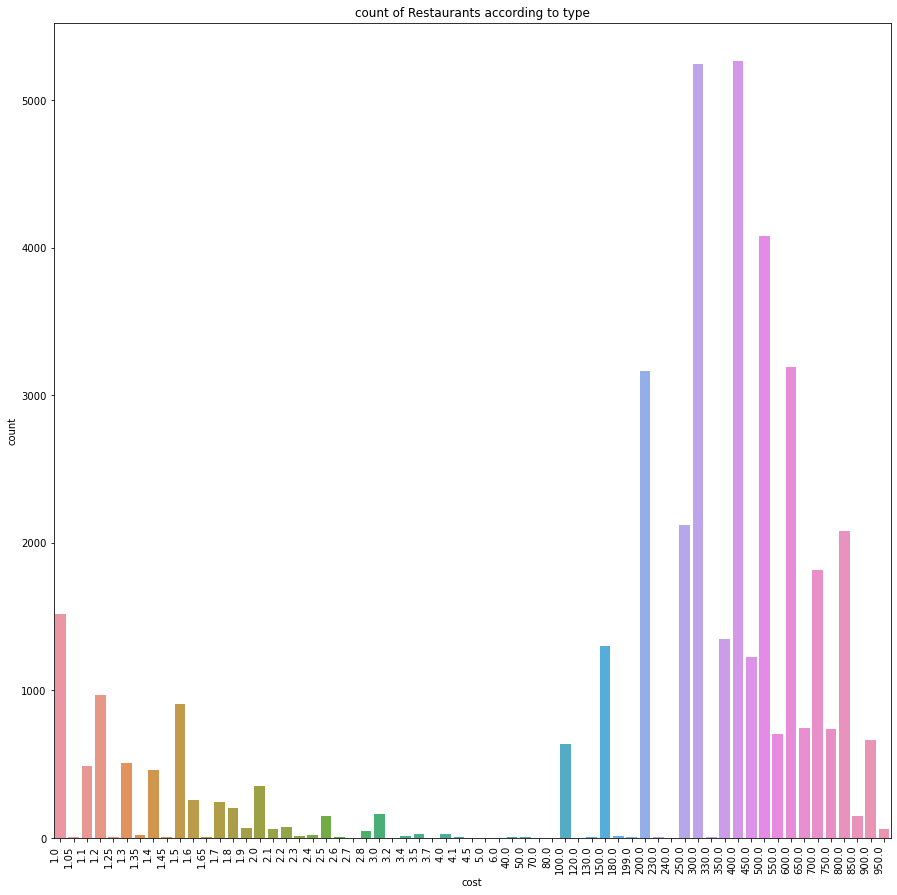

In [101]:
#i want to see which types of restaurant are more...
sns.countplot(zomato5_copy['cost'])
sns.countplot(zomato5_copy['cost']).set_xticklabels(
sns.countplot(zomato5_copy['cost']).get_xticklabels(),
rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.title("cost of resurant 
          ")